add data augmentation, optimizer RMSprop, keeping everything else the same

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from keras.layers import Dropout, Dense, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
print(os.getcwd())

data_dir = '/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project/Dataset'
data_dir_resized = '/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project/Resize '

Name = os.listdir(data_dir)
print(Name)
print(len(Name))
NameLabels = ['Acute Ischemic Stroke', 'Control']
print(NameLabels)
print(len(NameLabels))

N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name))

/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project
['.DS_Store', 'Stroke', 'Control']
3
['Acute Ischemic Stroke', 'Control']
2


In [3]:
# ResNet and VGG preprocess_input will convert the input images from RGB to BGR, 
# then will zero-center each color channel with respect to the ImageNet dataset, without scaling
preprocess_input = tf.keras.applications.vgg19.preprocess_input

# Rescaling the input image and Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
        validation_split=0.2,
        rotation_range=30,
        width_shift_range=0.2,
        preprocessing_function=preprocess_input,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "training")

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "validation")

Found 1609 images belonging to 2 classes.
Found 401 images belonging to 2 classes.


In [4]:
for image, label in train_generator:
      print(type(image))
      print(label)
      print(label[0])   # one-hot label
      print(NameLabels[np.argmax(label[0])])  # text label
      print(image[0].shape)
      break

<class 'numpy.ndarray'>
[1. 0. 0. 1. 1. 0.]
1.0
Acute Ischemic Stroke
(255, 255, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4771765..-0.12184102].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.1667725].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..-0.0647785].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..-0.14132218].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..-0.13816437].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.471192].


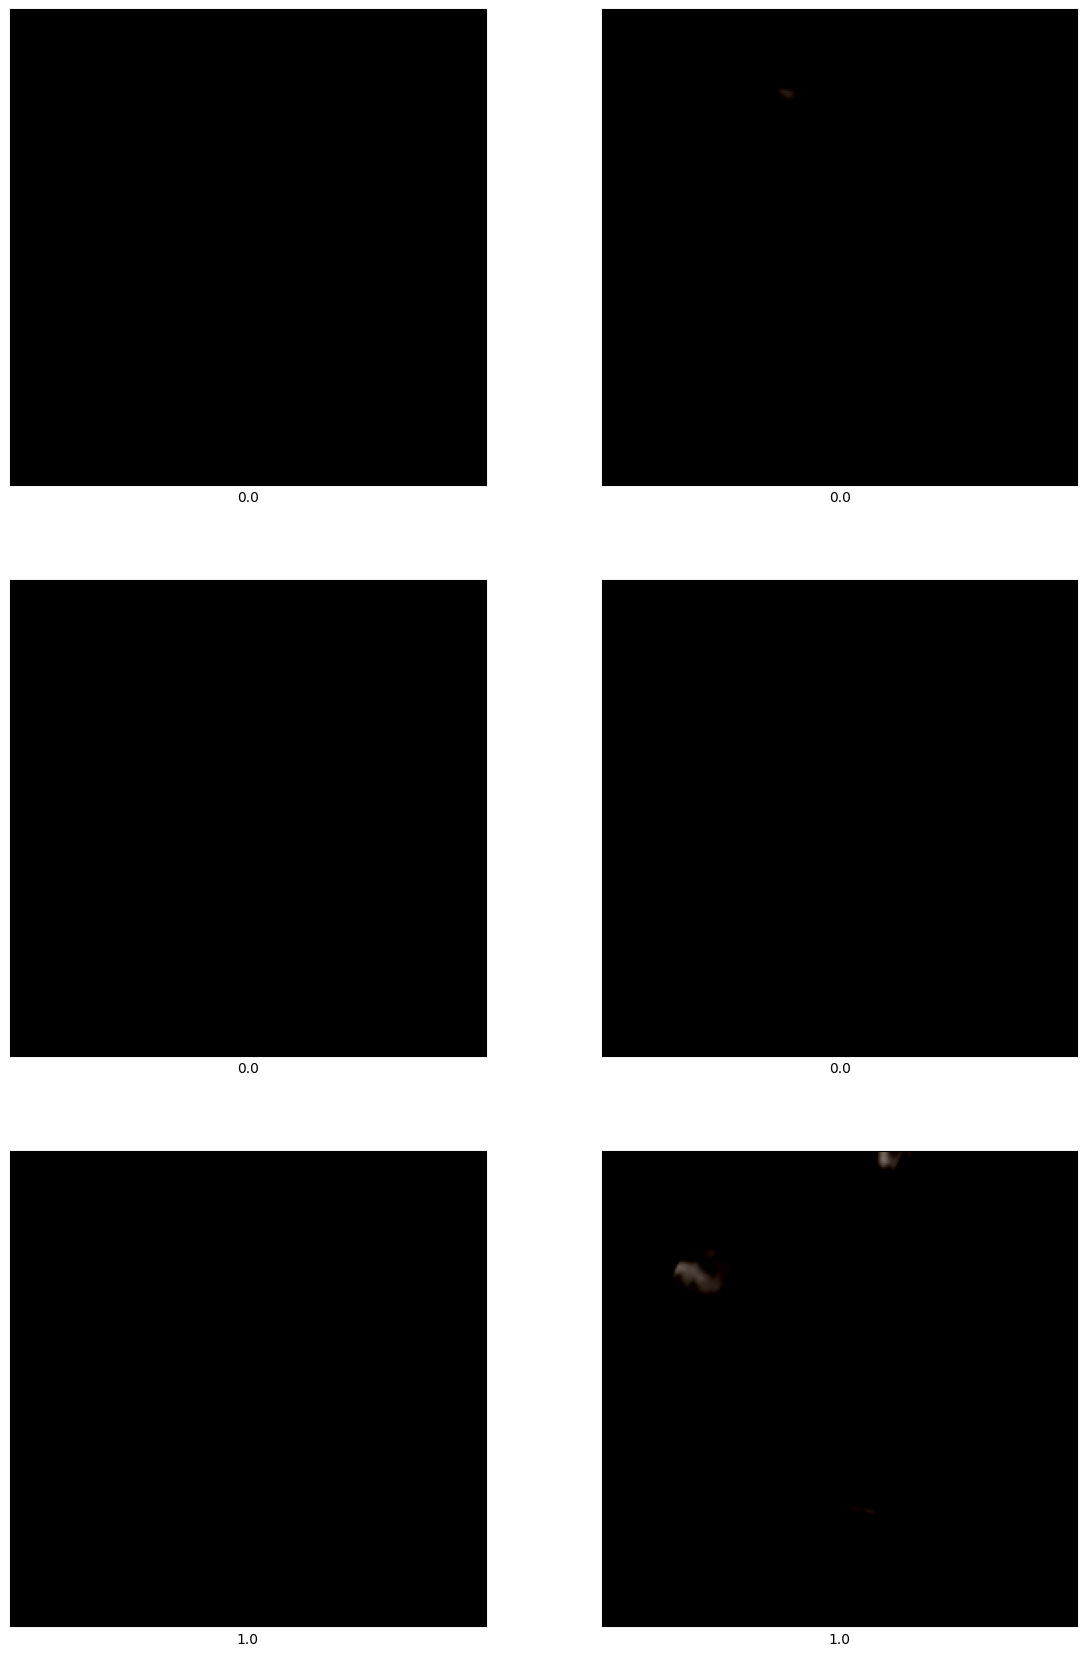

In [5]:
# browse some images
f = plt.figure(figsize=(14, 21))
for p in range(6):
    for image, label in train_generator:
        f.add_subplot(3,2,p+1)
        plt.imshow(image[p])
        # plt.title(NameLabels[np.argmax(label[p])])
        plt.xlabel(label[p], fontsize=10)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        break
plt.show()

# MODEL 0

simple CNN

In [6]:
model = tf.keras.Sequential()
# layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (255, 255, 3))) # image size is 255x255 with three layers for colors
model.add(layers.MaxPooling2D((2, 2)))
# layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
# layer 4
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Flatten())
# layer 5
model.add(layers.Dense(1, activation= 'sigmoid'))

/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.build()

In [8]:
# model.summary()

In [9]:
model.compile(
    optimizer = RMSprop(learning_rate=0.01), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


269/269 ━━━━━━━━━━━━━━━━━━━━ 78s 281ms/step - binary_accuracy: 0.5754 - loss: 37.9606 - val_binary_accuracy: 0.5012 - val_loss: 0.6931
Epoch 2/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 76s 278ms/step - binary_accuracy: 0.5077 - loss: 0.8167 - val_binary_accuracy: 0.4988 - val_loss: 0.6932
Epoch 3/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 81s 298ms/step - binary_accuracy: 0.5056 - loss: 0.6936 - val_binary_accuracy: 0.4988 - val_loss: 0.6932
Epoch 4/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 75s 274ms/step - binary_accuracy: 0.4746 - loss: 0.6940 - val_binary_accuracy: 0.5012 - val_loss: 0.6933
Epoch 5/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 74s 273ms/step - binary_accuracy: 0.4830 - loss: 0.6943 - val_binary_accuracy: 0.5012 - val_loss: 0.6932
Epoch 6/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 74s 273ms/step - binary_accuracy: 0.5469 - loss: 0.6914 - val_binary_accuracy: 0.4988 - val_loss: 0.6932
Epoch 7/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 76s 278ms/step - binary_accuracy: 0.4987 - loss: 0.6939 - val_binary_accuracy: 0.5012 - val_loss: 0.

In [10]:
def plot_loss_accuracy(history, title):
  fig = plt.figure(figsize=(13, 6))
  plt.suptitle(f"Binary classifier, stroke detection based on  MRI images\n\n {title}", fontsize=14)
  ax1 = fig.add_subplot(1,2,1)
  plt.plot(history.history['binary_accuracy'], 'r', label='Training accuracy')
  plt.plot(history.history['val_binary_accuracy'], 'purple', label='Validation accuracy')
  plt.title('Training and validation accuracy', fontsize=12)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.xticks(range(0,30,2), labels=range(1,31,2))
  plt.legend(fontsize=12, loc=4)
  plt.grid(True, alpha=0.5)

  ax2 = fig.add_subplot(1,2,2)
  plt.plot(history.history['loss'], 'g', label='Training loss')
  plt.plot(history.history['val_loss'], 'b', label='Validation loss')
  plt.title('Training and validation loss', fontsize=12)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  handles, labels = plt.gca().get_legend_handles_labels()
  order = [1, 0]
  plt.xticks(range(0,30,2), labels=range(1,31,2))
  plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], fontsize=12, loc=4) 
  plt.legend(fontsize=14, loc=7)
  plt.grid(True, alpha=0.4)
  plt.tight_layout()
  plt.show()

In [87]:
print(len(model.layers))

9


In [11]:
max(history.history['val_binary_accuracy'])

0.5012468695640564

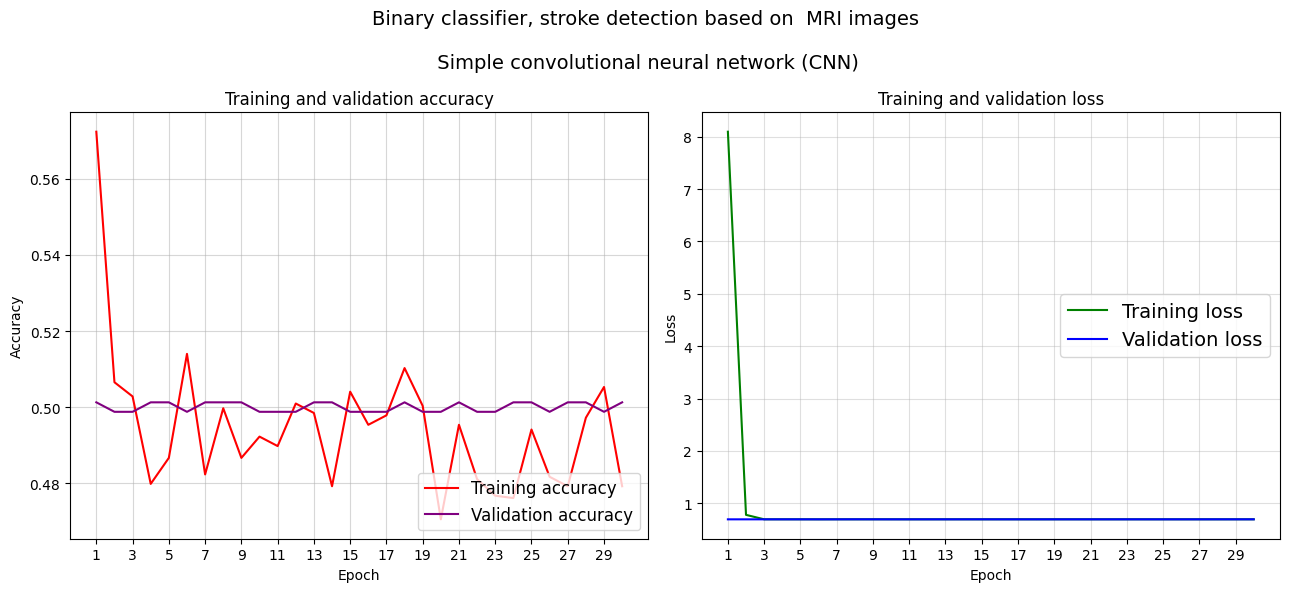

In [12]:
plot_loss_accuracy(history, "Simple convolutional neural network (CNN)")

the model quickly overfit. 

validation accuracy is in broad strokes only slightly better than random chance

# MODEL 1

#### updated simple CNN - model1

the updated simple CNN model is bigger, has an extra layer, more neurons, L2 regularization and dropout added and smaller learning rate

In [13]:
model1 = tf.keras.Sequential()
# layer 1
model1.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = (255, 255, 3))) # image size is 255x255 with three layers for colors
model1.add(layers.MaxPooling2D((2, 2)))
# layer 2
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
# layer 3
model1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
# layer 4
model1.add(layers.Conv2D(512, (3, 3), activation='relu', use_bias=True,
    kernel_regularizer =tf.keras.regularizers.l2( 0.01)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
# layer 5
model1.add(layers.Dense(1024, activation='relu', use_bias=True,
    kernel_regularizer =tf.keras.regularizers.l2( 0.01)))
model1.add(Dropout(0.5))
# layer 6
model1.add(layers.Dense(1, activation= 'sigmoid'))

/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 253, 253, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │   102,761,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,313,473 (397.92 MB)

 Trainable params: 104,313,473 (397.92 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model1.compile(
    optimizer = RMSprop(learning_rate=1e-5), # 0.00001
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

history1 = model1.fit(
    train_generator,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 531s 2s/step - binary_accuracy: 0.5285 - loss: 22.7336 - val_binary_accuracy: 0.4988 - val_loss: 18.2781
Epoch 2/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 498s 2s/step - binary_accuracy: 0.5333 - loss: 17.0360 - val_binary_accuracy: 0.4988 - val_loss: 13.8471
Epoch 3/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 530s 2s/step - binary_accuracy: 0.6287 - loss: 12.7853 - val_binary_accuracy: 0.4988 - val_loss: 12.8905
Epoch 4/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 500s 2s/step - binary_accuracy: 0.6356 - loss: 9.6550 - val_binary_accuracy: 0.4988 - val_loss: 13.8064
Epoch 5/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 500s 2s/step - binary_accuracy: 0.6367 - loss: 7.3606 - val_binary_accuracy: 0.4988 - val_loss: 13.7296
Epoch 6/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 470s 2s/step - binary_accuracy: 0.6664 - loss: 5.6625 - val_binary_accuracy: 0.4988 - val_loss: 12.5278
Epoch 7/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - binary_accuracy: 0.6458 - loss: 4.4222 - val_binary_accuracy: 0.4988 - val_los

In [88]:
print(len(model1.layers))

12


In [16]:
max(history1.history['val_binary_accuracy'])

0.4987531304359436

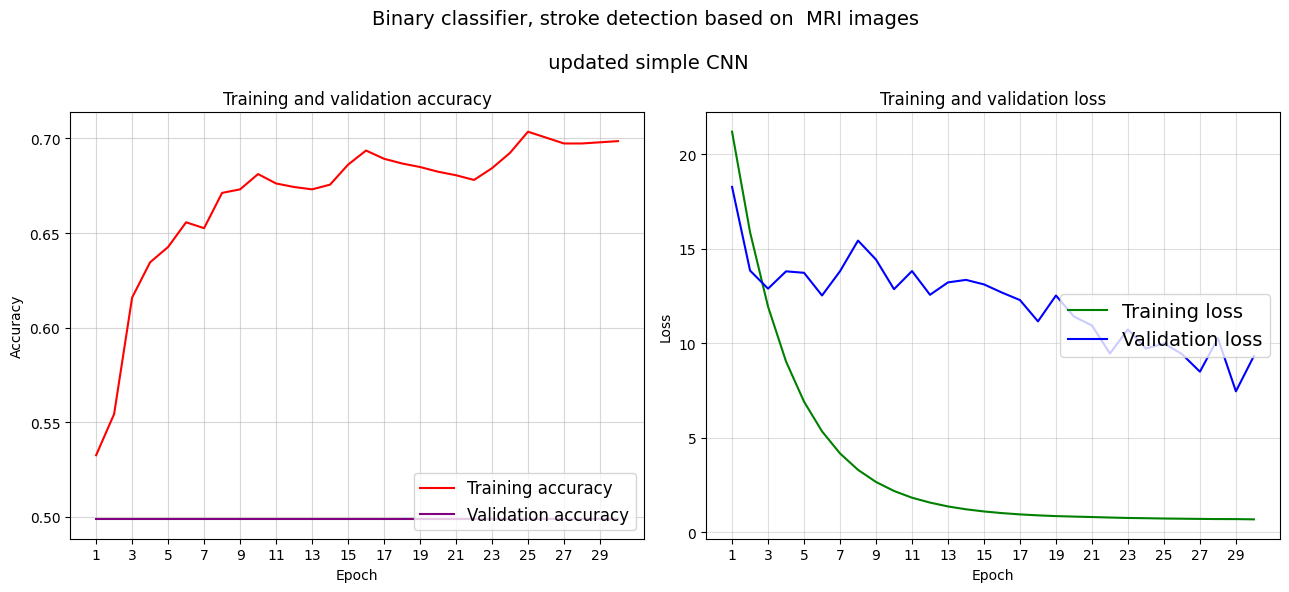

In [17]:
plot_loss_accuracy(history1, "updated simple CNN")

model1 did not overfit as fast as the original model, but the improvement was minor

# PRETRAINED MODELS

I explored four different pretrained models - VGG19, ResNet50, InceptionV3, EfficientNetB0 - and created two versions of each, while keepin the rest of the parameters same:
1. with all layers frozen and 
1. with 3 unfrozen layers

# MODEL 2_aug

#### pretrained model VGG19 (Visual Geometry Group), all layers frozen, model2

In [18]:
# instantiating VGG19 convolutional base
pre_trained_model2 = keras.applications.vgg19.VGG19(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model2.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model2.summary()

In [19]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model2.get_layer('block5_pool')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 512)


In [20]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)

In [21]:
# Add a final sigmmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model2 = Model(pre_trained_model2.input, outputs) 

# Print the model summary
# model2.summary()

In [22]:
model2.compile(
    optimizer = RMSprop(learning_rate=0.01), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model2_aug.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history2 = model2.fit(
    train_generator,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


269/269 ━━━━━━━━━━━━━━━━━━━━ 588s 2s/step - binary_accuracy: 0.5998 - loss: 1.4007 - val_binary_accuracy: 0.5736 - val_loss: 0.7312
Epoch 2/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 589s 2s/step - binary_accuracy: 0.6242 - loss: 0.6569 - val_binary_accuracy: 0.4988 - val_loss: 0.7213
Epoch 3/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 586s 2s/step - binary_accuracy: 0.6423 - loss: 0.6419 - val_binary_accuracy: 0.6085 - val_loss: 0.7145
Epoch 4/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 586s 2s/step - binary_accuracy: 0.6580 - loss: 0.6260 - val_binary_accuracy: 0.5436 - val_loss: 0.6886
Epoch 5/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 585s 2s/step - binary_accuracy: 0.6292 - loss: 0.6293 - val_binary_accuracy: 0.5736 - val_loss: 0.7513
Epoch 6/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 586s 2s/step - binary_accuracy: 0.6747 - loss: 0.6035 - val_binary_accuracy: 0.5835 - val_loss: 0.7287
Epoch 7/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 587s 2s/step - binary_accuracy: 0.7029 - loss: 0.5792 - val_binary_accuracy: 0.5037 - val_loss: 1.2072
Epoch 8/30

In [89]:
print(len(model2.layers))

26


In [23]:
max(history2.history['val_binary_accuracy'])

0.6084787845611572

In [24]:
#the best model2_aug
best_model2 = keras.models.load_model("model2_aug.keras") 
val_loss, val_binary_acc = best_model2.evaluate(validation_generator) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - binary_accuracy: 0.6295 - loss: 0.7003
Validation accuracy: 0.608


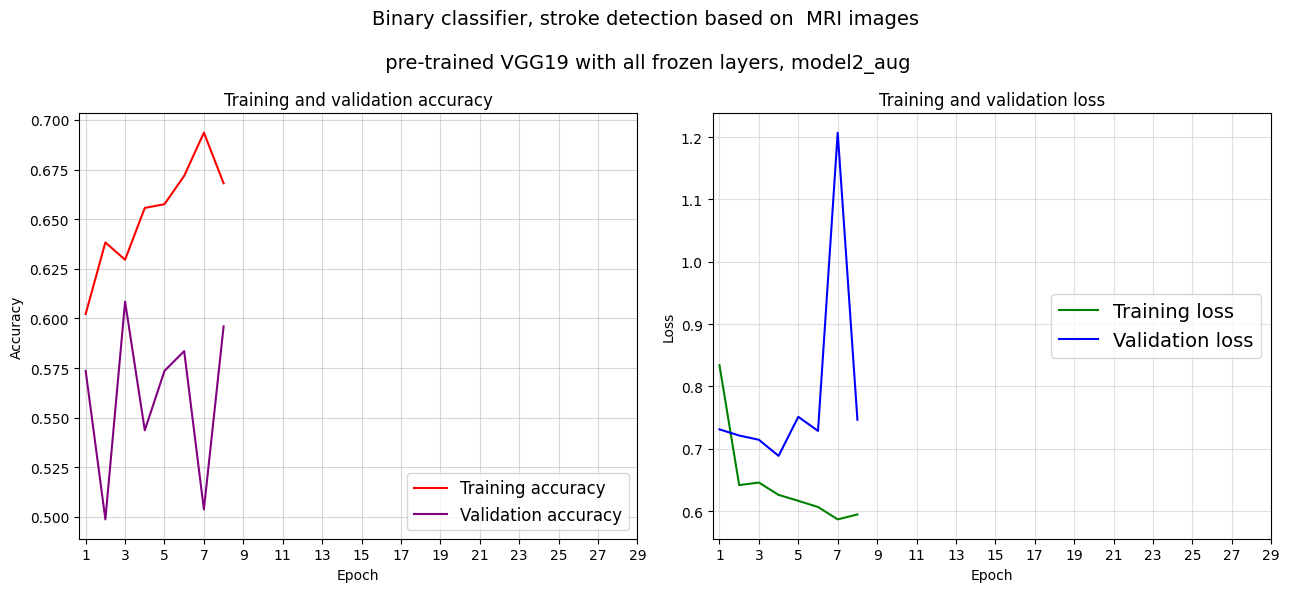

In [25]:
plot_loss_accuracy(history2, "pre-trained VGG19 with all frozen layers, model2_aug")

outcome of model2 was worse than the baseline

# MODEL 3_aug

#### pretrained model VGG19 (Visual Geometry Group), 16 frozen and 3 unfrozen layers, model3

In [26]:
# instantiating VGG19 convolutional base
pre_trained_model3 = keras.applications.vgg19.VGG19(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the first 16 layers, leave last 3 trainable
pre_trained_model3.trainable = True
for layer in pre_trained_model3.layers[:-4]:  # loop through all but the last three layers
    layer.trainable = False  # make them not trainable

# printing out the summary of the pretrained model
# pre_trained_model3.summary()

In [27]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model3.get_layer('block5_pool')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 512)


In [28]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

x = layers.GlobalAveragePooling2D()(x)

In [29]:
# Add a final sigmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model3 = Model(pre_trained_model3.input, outputs) 

# Print the model summary. See your dense network connected at the end.
# model3.summary()

In [30]:
model3.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model3_aug.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history3 = model3.fit(
    train_generator,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


269/269 ━━━━━━━━━━━━━━━━━━━━ 652s 2s/step - binary_accuracy: 0.6117 - loss: 0.6564 - val_binary_accuracy: 0.5711 - val_loss: 0.7021
Epoch 2/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 648s 2s/step - binary_accuracy: 0.6470 - loss: 0.6128 - val_binary_accuracy: 0.5786 - val_loss: 0.6959
Epoch 3/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 648s 2s/step - binary_accuracy: 0.6828 - loss: 0.5883 - val_binary_accuracy: 0.6259 - val_loss: 0.6835
Epoch 4/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 650s 2s/step - binary_accuracy: 0.7058 - loss: 0.5750 - val_binary_accuracy: 0.5985 - val_loss: 0.6699
Epoch 5/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 648s 2s/step - binary_accuracy: 0.7328 - loss: 0.5311 - val_binary_accuracy: 0.6409 - val_loss: 0.6552
Epoch 6/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 650s 2s/step - binary_accuracy: 0.7372 - loss: 0.5207 - val_binary_accuracy: 0.6284 - val_loss: 0.6658
Epoch 7/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 648s 2s/step - binary_accuracy: 0.7471 - loss: 0.5146 - val_binary_accuracy: 0.6584 - val_loss: 0.6458
Epoch 8/30

In [90]:
print(len(model3.layers))

26


In [31]:
max(history3.history['val_binary_accuracy'])

0.7605984807014465

In [32]:
#the best model3_aug
best_model3 = keras.models.load_model("model3_aug.keras") 
val_loss, val_binary_acc = best_model3.evaluate(validation_generator) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - binary_accuracy: 0.7626 - loss: 0.5305
Validation accuracy: 0.761


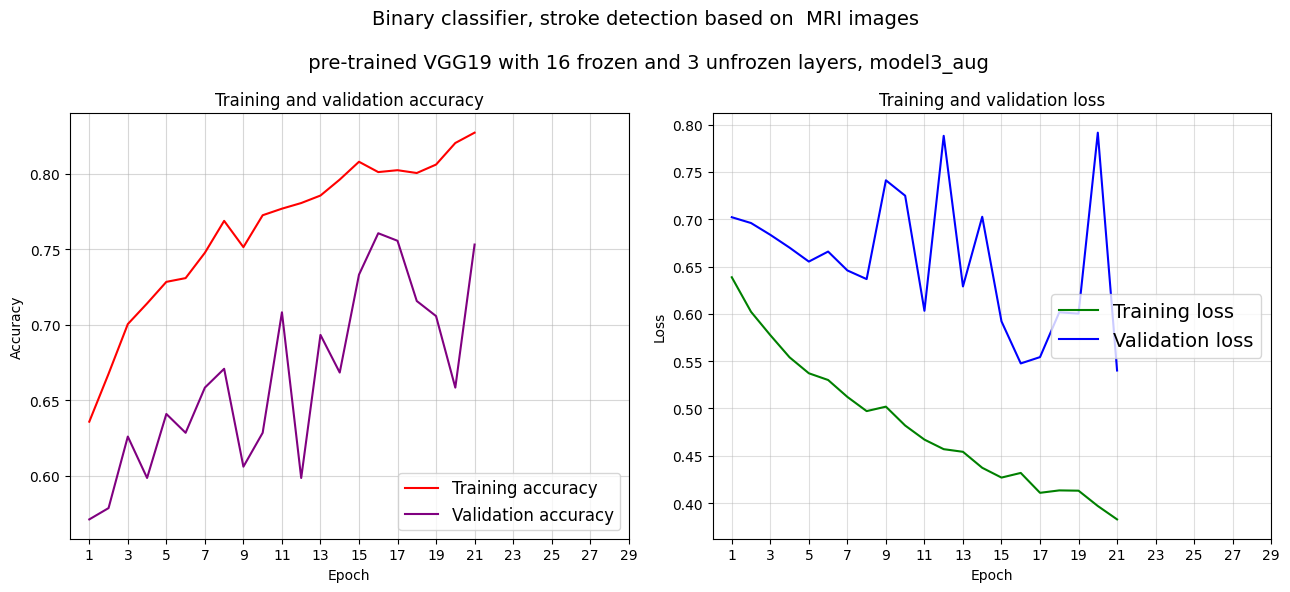

In [33]:
plot_loss_accuracy(history3, "pre-trained VGG19 with 16 frozen and 3 unfrozen layers, model3_aug")

model 3 outcome was a big improvement over previous models. improvement may continue if there were more epochs.

# MODEL 4_aug

#### pretrained model: ResNet50, all frozen layers, model4

In [34]:
# instantiating ResNet50 convolutional base
inputs = layers.Input(shape=(224, 224, 3))
pre_trained_model4 = keras.applications.ResNet50(
    input_tensor = inputs, 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model4.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model4.summary()

In [35]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model4.get_layer('conv5_block3_out') 

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 2048)


In [36]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)

# Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)  

In [37]:
# Add a final sigmmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model4 = Model(pre_trained_model4.input, outputs) 

# Print the model summary. See your dense network connected at the end.
# model4.summary()

In [38]:
# ResNet and VGG preprocess_input will convert the input images from RGB to BGR, 
# then will zero-center each color channel with respect to the ImageNet dataset, without scaling
preprocess_input_resnet = tf.keras.applications.resnet.preprocess_input
        
# Rescaling the input image
train_datagen_resnet = ImageDataGenerator(preprocessing_function=preprocess_input_resnet,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen_resnet = ImageDataGenerator(validation_split=0.2)

train_generator_resnet = train_datagen_resnet.flow_from_directory(
    data_dir,
    target_size=(224,224),
    class_mode='binary',
    batch_size=6,
    subset = "training")

validation_generator_resnet = validation_datagen_resnet.flow_from_directory(
    data_dir,
    target_size=(224,224),
    class_mode='binary',
    batch_size=6,
    subset = "validation")

Found 2010 images belonging to 2 classes.
Found 401 images belonging to 2 classes.


In [39]:
model4.compile(
    optimizer = RMSprop(learning_rate=0.01), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model4_aug.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history4 = model4.fit(
    train_generator_resnet,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator_resnet,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 247s 718ms/step - binary_accuracy: 0.6582 - loss: 1.5109 - val_binary_accuracy: 0.7706 - val_loss: 0.7446
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 240s 715ms/step - binary_accuracy: 0.7397 - loss: 0.5981 - val_binary_accuracy: 0.7357 - val_loss: 0.7137
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 241s 718ms/step - binary_accuracy: 0.7865 - loss: 0.4730 - val_binary_accuracy: 0.7107 - val_loss: 0.6217
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 238s 708ms/step - binary_accuracy: 0.8168 - loss: 0.4246 - val_binary_accuracy: 0.6708 - val_loss: 1.0389
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 238s 708ms/step - binary_accuracy: 0.8018 - loss: 0.4262 - val_binary_accuracy: 0.7406 - val_loss: 0.6513
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 239s 713ms/step - binary_accuracy: 0.7809 - loss: 0.4669 - val_binary_accuracy: 0.8454 - val_loss: 0.3480
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 240s 716ms/step - binary_accuracy: 0.8110 - loss: 0.4105 - val_binary_accuracy: 0.8329 - val_lo

In [91]:
print(len(model4.layers))

179


In [40]:
max(history4.history['val_binary_accuracy'])

0.8453865051269531

In [41]:
#the best model4_aug
best_model4 = keras.models.load_model("model4_aug.keras") 
val_loss, val_binary_acc = best_model4.evaluate(validation_generator_resnet) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 38s 528ms/step - binary_accuracy: 0.8346 - loss: 0.3513
Validation accuracy: 0.845


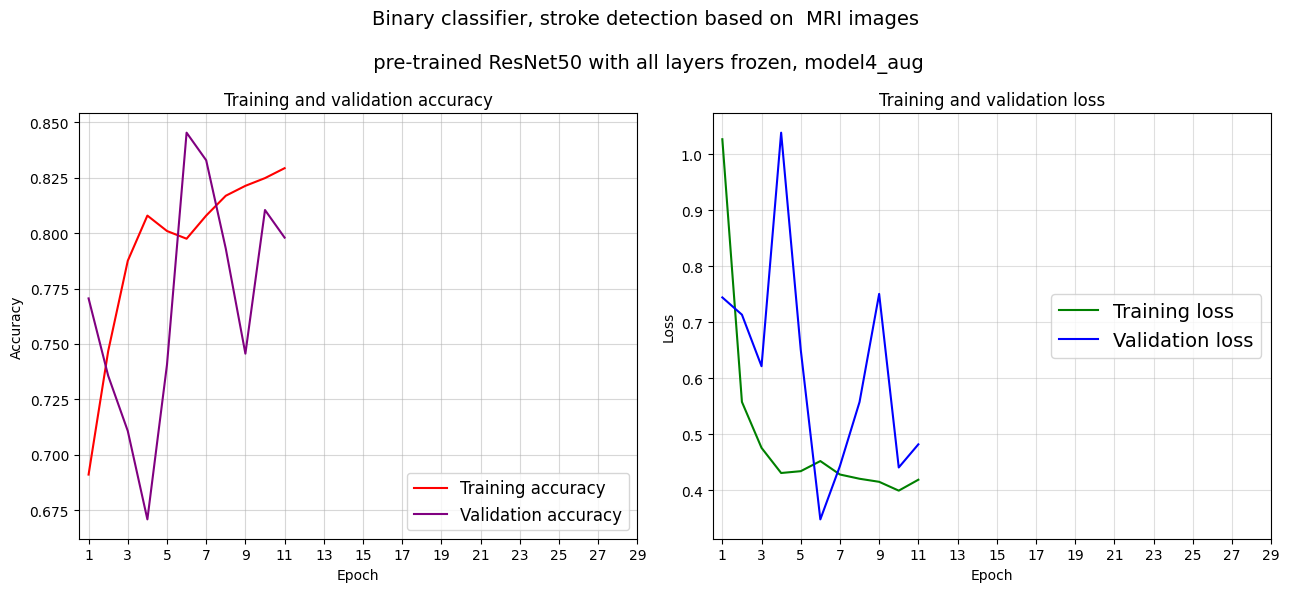

In [42]:
plot_loss_accuracy(history4, "pre-trained ResNet50 with all layers frozen, model4_aug")

model4 outcome was worse than baseline model0, no better than random chance

# MODEL 5_aug

#### pretrained model: ResNet50, 3 unfrozen layers, model5

In [43]:
# instantiating ResNet50 convolutional base
inputs = layers.Input(shape=(224, 224, 3))
pre_trained_model5 = keras.applications.ResNet50(
    input_tensor = inputs, 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights, leave last 3 trainable
pre_trained_model5.trainable = True
for layer in pre_trained_model5.layers[:-4]:  # loop through all but the last three layers
    layer.trainable = False  # make them not trainable

# printing out the summary of the pretrained model
# pre_trained_model5.summary()

In [44]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model5.get_layer('conv5_block3_out')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 2048)


In [45]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)

# Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)  

In [46]:
# Add a final sigmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model5 = Model(pre_trained_model5.input, outputs) 

# Print the model summary. See your dense network connected at the end.
# model5.summary()

In [47]:
model5.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model5_aug.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history5 = model5.fit(
    train_generator_resnet,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator_resnet,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


335/335 ━━━━━━━━━━━━━━━━━━━━ 257s 748ms/step - binary_accuracy: 0.6447 - loss: 0.6869 - val_binary_accuracy: 0.6384 - val_loss: 0.8073
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 253s 755ms/step - binary_accuracy: 0.7626 - loss: 0.5165 - val_binary_accuracy: 0.6783 - val_loss: 0.9020
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 251s 748ms/step - binary_accuracy: 0.7542 - loss: 0.4928 - val_binary_accuracy: 0.7706 - val_loss: 0.5614
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 254s 757ms/step - binary_accuracy: 0.7714 - loss: 0.4636 - val_binary_accuracy: 0.7955 - val_loss: 0.4621
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 252s 749ms/step - binary_accuracy: 0.7983 - loss: 0.4519 - val_binary_accuracy: 0.7307 - val_loss: 0.6798
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 250s 746ms/step - binary_accuracy: 0.8143 - loss: 0.4248 - val_binary_accuracy: 0.7332 - val_loss: 0.6635
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 250s 745ms/step - binary_accuracy: 0.7997 - loss: 0.4379 - val_binary_accuracy: 0.7731 - val_lo

In [92]:
print(len(model5.layers))

179


In [48]:
max(history5.history['val_binary_accuracy'])

0.7955112457275391

In [49]:
#the best model5_aug
best_model5 = keras.models.load_model("model5_aug.keras") 
val_loss, val_binary_acc = best_model5.evaluate(validation_generator_resnet) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 37s 512ms/step - binary_accuracy: 0.7683 - loss: 0.5129
Validation accuracy: 0.796


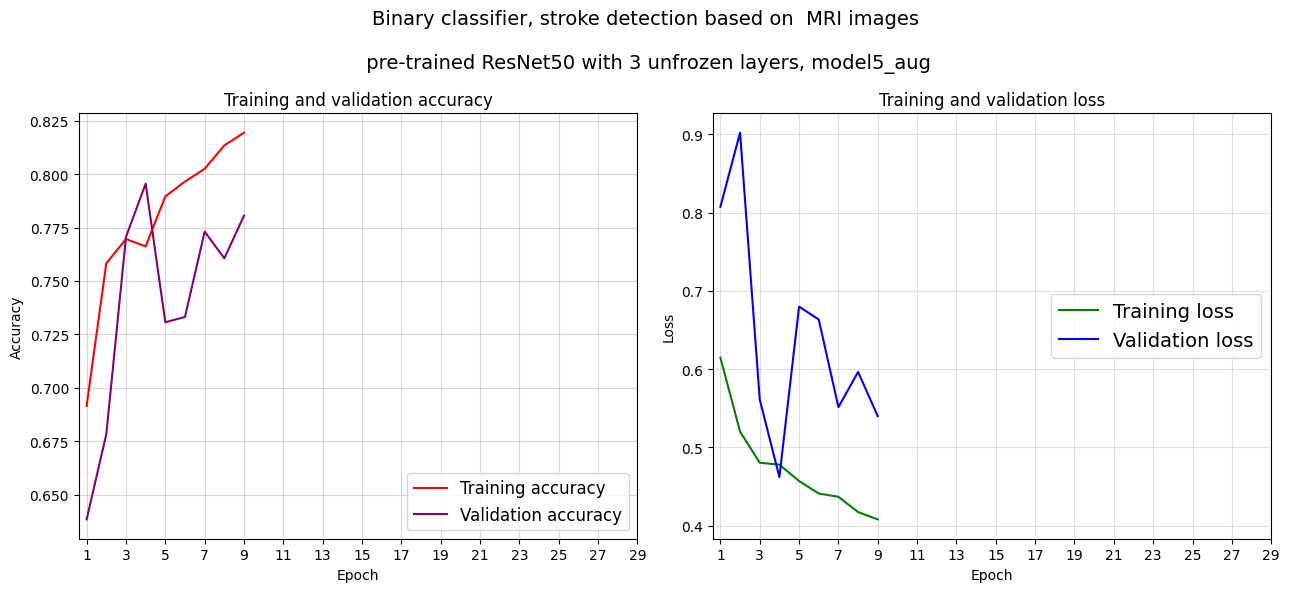

In [50]:
plot_loss_accuracy(history5, "pre-trained ResNet50 with 3 unfrozen layers, model5_aug")

model 5 performed worse than baseline

# MODEL 6_aug

#### pretrained model: InceptionV3, all frozen layers, model6

In [51]:
# instantiating InceptionV3 convolutional base
pre_trained_model6 = keras.applications.InceptionV3(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model6.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model6.summary()

In [52]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model6.get_layer('mixed10')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 2048)


In [53]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)

In [54]:
# Add a final sigmmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model6 = Model(pre_trained_model6.input, outputs) 

# Print the model summary. See your dense network connected at the end.
# model6.summary()

In [55]:
# Inceptionv3 preproces_input will scale input pixels between -1 and 1, 

preprocess_input_inc = tf.keras.applications.inception_v3.preprocess_input

# Rescaling the input image and Data Augmentation
# train_datagen_inc = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input_resnet,)
# train_datagen_inc = ImageDataGenerator(rescale = 1./255,
#         rotation_range=30,
#         width_shift_range=0.2,
#         preprocessing_function=preprocess_input_inc,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

validation_datagen_inc = ImageDataGenerator(validation_split=0.2)

train_generator_inc = train_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "training")

validation_generator_inc = validation_datagen_inc.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "validation")

Found 1609 images belonging to 2 classes.
Found 401 images belonging to 2 classes.


In [56]:
model6.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model6_aug.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history6 = model6.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


269/269 ━━━━━━━━━━━━━━━━━━━━ 163s 582ms/step - binary_accuracy: 0.6534 - loss: 0.6300 - val_binary_accuracy: 0.6484 - val_loss: 0.6313
Epoch 2/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 158s 585ms/step - binary_accuracy: 0.7433 - loss: 0.5161 - val_binary_accuracy: 0.6858 - val_loss: 0.6068
Epoch 3/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 158s 585ms/step - binary_accuracy: 0.7602 - loss: 0.4883 - val_binary_accuracy: 0.7082 - val_loss: 0.5868
Epoch 4/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 201s 582ms/step - binary_accuracy: 0.7777 - loss: 0.4619 - val_binary_accuracy: 0.7107 - val_loss: 0.5708
Epoch 5/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 157s 581ms/step - binary_accuracy: 0.7701 - loss: 0.4669 - val_binary_accuracy: 0.7207 - val_loss: 0.5591
Epoch 6/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 158s 586ms/step - binary_accuracy: 0.7821 - loss: 0.4552 - val_binary_accuracy: 0.7232 - val_loss: 0.5671
Epoch 7/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 157s 582ms/step - binary_accuracy: 0.7989 - loss: 0.4266 - val_binary_accuracy: 0.7431 - val_lo

In [93]:
print(len(model6.layers))

315


In [57]:
max(history6.history['val_binary_accuracy'])

0.7431421279907227

In [58]:
#the best model6_aug
best_model6 = keras.models.load_model("model6_aug.keras") 
val_loss, val_binary_acc = best_model6.evaluate(validation_generator) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


67/67 ━━━━━━━━━━━━━━━━━━━━ 30s 393ms/step - binary_accuracy: 0.5123 - loss: 20.6537
Validation accuracy: 0.501


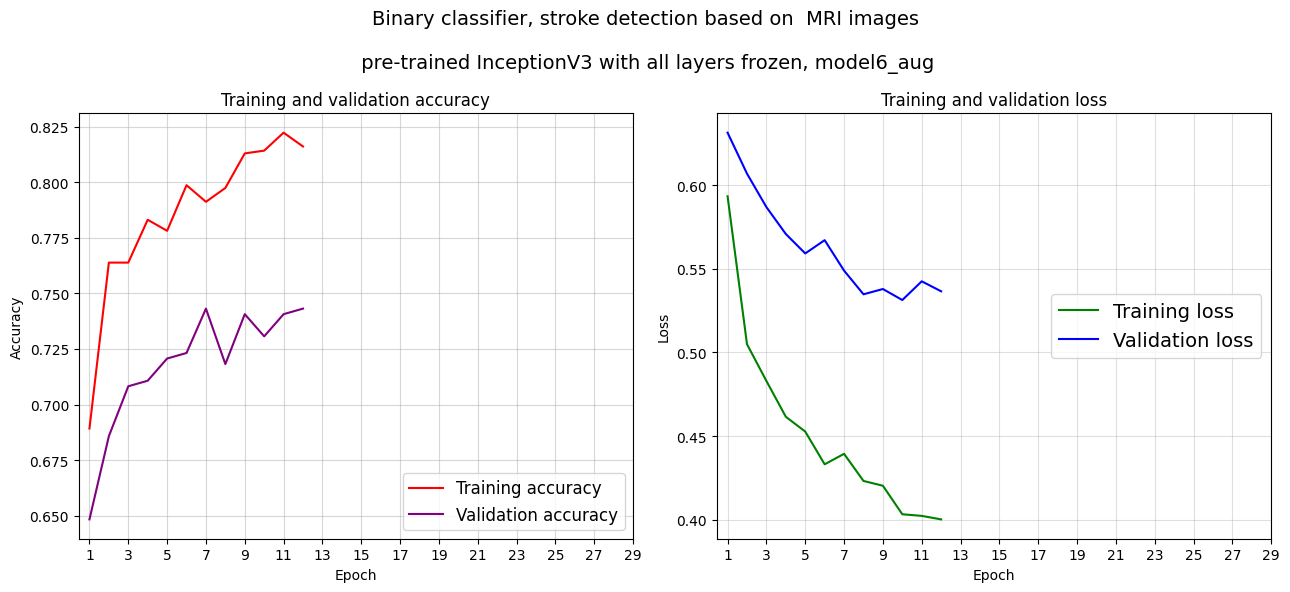

In [59]:
plot_loss_accuracy(history6, "pre-trained InceptionV3 with all layers frozen, model6_aug")

model 6 is an improvement over the baseline, achieving around 85% accuracy

# MODEL 7_aug

#### pretrained model: InceptionV3, 3 unfrozen layers, model7

In [60]:
# instantiating InceptionV3 convolutional base
pre_trained_model7 = keras.applications.InceptionV3(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# # Freeze the weights, leave last 3 trainable
# pre_trained_model7.trainable = True
# for layer in pre_trained_model7.layers[:-4]:  # loop through all but the last three layers
#     layer.trainable = False  # make them not trainable

# Freeze the weights, leave 25 trainable, but not Batchnomalization
# pre_trained_model7.trainable = True
for layer in pre_trained_model7.layers[-25:]:  # loop through all but the last 25 layers
    if not isinstance(layer,layers.BatchNormalization):
        layer.trainable = True  # make them trainable

# printing out the summary of the pretrained model
# pre_trained_model7.summary()

In [61]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model7.get_layer('mixed10') 

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 2048)


In [62]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)

In [63]:
# Add a final sigmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model7 = Model(pre_trained_model7.input, outputs) 

# Print the model summary. See your dense network connected at the end.
# model7.summary()

In [86]:
model7.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model7_aug.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history7 = model7.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 410s 1s/step - binary_accuracy: 0.9321 - loss: 0.1882 - val_binary_accuracy: 0.5012 - val_loss: 1.3008
Epoch 2/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - binary_accuracy: 0.9460 - loss: 0.1455 - val_binary_accuracy: 0.5012 - val_loss: 1.2024
Epoch 3/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - binary_accuracy: 0.9166 - loss: 0.2020 - val_binary_accuracy: 0.5012 - val_loss: 1.3885
Epoch 4/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - binary_accuracy: 0.9245 - loss: 0.1976 - val_binary_accuracy: 0.5012 - val_loss: 1.5162
Epoch 5/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 237s 880ms/step - binary_accuracy: 0.9363 - loss: 0.1532 - val_binary_accuracy: 0.5012 - val_loss: 1.6548
Epoch 6/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 149s 552ms/step - binary_accuracy: 0.9574 - loss: 0.1410 - val_binary_accuracy: 0.5012 - val_loss: 1.6238


In [94]:
print(len(model7.layers))

315


In [65]:
max(history7.history['val_binary_accuracy'])

0.586034893989563

In [66]:
#the best model7_aug
best_model7 = keras.models.load_model("model7_aug.keras") 
val_loss, val_binary_acc = best_model7.evaluate(validation_generator) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 29s 387ms/step - binary_accuracy: 0.5255 - loss: 15.8687
Validation accuracy: 0.501


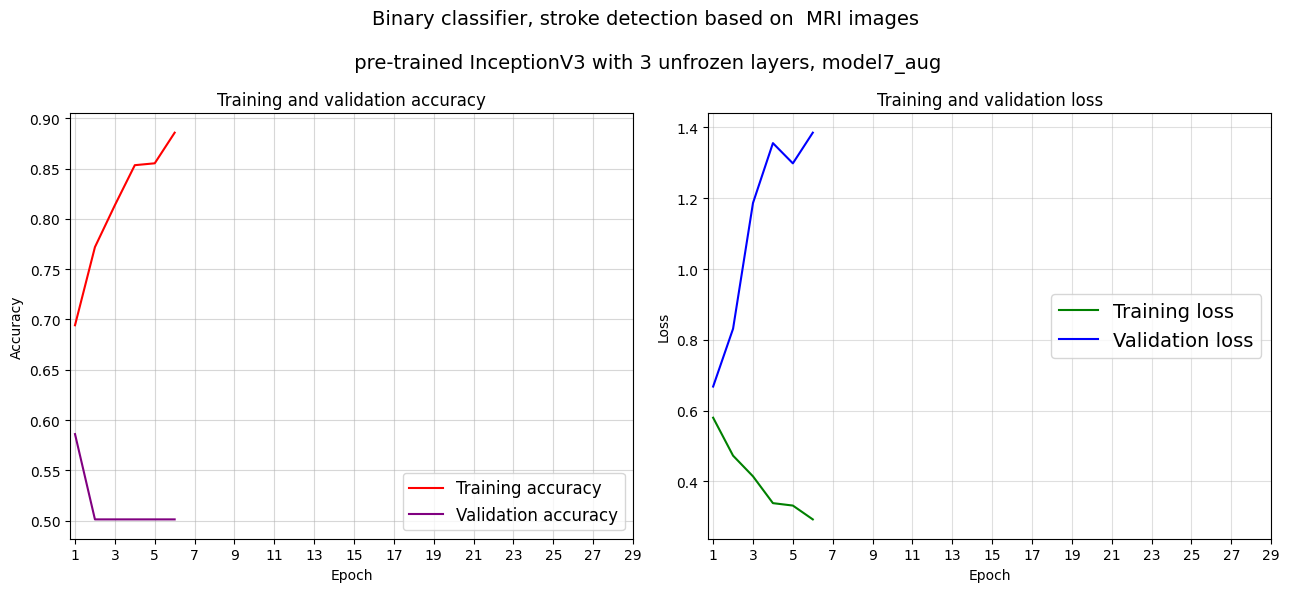

In [67]:
plot_loss_accuracy(history7, "pre-trained InceptionV3 with 3 unfrozen layers, model7_aug")

model7 is very similar to model 6, improvement over baseline. training last 3 layers does not seem to add

# MODEL 8_aug

#### pretrained model: EfficientNetB0, all frozen layers, model8

In [68]:
# instantiating EfficientNetB0 convolutional base
inputs = layers.Input(shape=(224, 224, 3))
pre_trained_model8 = keras.applications.EfficientNetB0(
    # input_shape = (224, 224, 3), 
    input_tensor = inputs,
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model8.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model8.summary()

In [69]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model8.get_layer('top_activation')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 1280)


In [70]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D(name="avg_pool")(x)
x = layers.BatchNormalization()(x)

# # Add a dropout rate of 0.2
x = layers.Dropout(0.2, name="top_dropout")(x)  

In [71]:
# Add a final sigmmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid', name="pred")(x)           

# Append the dense network to the base model
model8 = Model(pre_trained_model8.input, outputs, name="EfficientNetB0") 

# Print the model summary. See your dense network connected at the end.
# model8.summary()

In [72]:
# EfficientNet preprocess_input is a pass-through function. 
# EfficientNet models expect their inputs to be float tensors of pixels with values in the [0-255] range

preprocess_input_en = tf.keras.applications.efficientnet.preprocess_input

# Data Augmentation

train_datagen_en = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    preprocessing_function=preprocess_input_en,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen_en = ImageDataGenerator( 
    validation_split=0.2)

train_generator_en = train_datagen_en.flow_from_directory(
    data_dir,
    target_size=(224,224),
    class_mode='binary',
    batch_size=6,
    subset = "training")

validation_generator_en = validation_datagen_en.flow_from_directory(
    data_dir,
    target_size=(224,224),
    class_mode='binary',
    batch_size=6,
    subset = "validation")

Found 2010 images belonging to 2 classes.
Found 401 images belonging to 2 classes.


In [73]:
model8.compile(
    optimizer = RMSprop(learning_rate=0.01), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model8.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history8 = model8.fit(
    train_generator_en,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator_en,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 127s 349ms/step - binary_accuracy: 0.6523 - loss: 1.6447 - val_binary_accuracy: 0.5337 - val_loss: 1.8811
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 120s 356ms/step - binary_accuracy: 0.7139 - loss: 0.7283 - val_binary_accuracy: 0.8105 - val_loss: 0.4451
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 121s 358ms/step - binary_accuracy: 0.7718 - loss: 0.5255 - val_binary_accuracy: 0.7656 - val_loss: 0.5750
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 126s 375ms/step - binary_accuracy: 0.7673 - loss: 0.5152 - val_binary_accuracy: 0.8254 - val_loss: 0.3705
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 125s 372ms/step - binary_accuracy: 0.7968 - loss: 0.4604 - val_binary_accuracy: 0.6883 - val_loss: 0.9138
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 125s 372ms/step - binary_accuracy: 0.7798 - loss: 0.4765 - val_binary_accuracy: 0.8504 - val_loss: 0.3321
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 129s 384ms/step - binary_accuracy: 0.8208 - loss: 0.4439 - val_binary_accuracy: 0.8579 - val_lo

In [95]:
print(len(model8.layers))

243


In [74]:
max(history8.history['val_binary_accuracy'])

0.8827930092811584

In [75]:
#the best model8_aug
best_model8 = keras.models.load_model("model8_aug.keras") 
val_loss, val_binary_acc = best_model8.evaluate(validation_generator_en) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 16s 202ms/step - binary_accuracy: 0.4700 - loss: 2.4572
Validation accuracy: 0.494


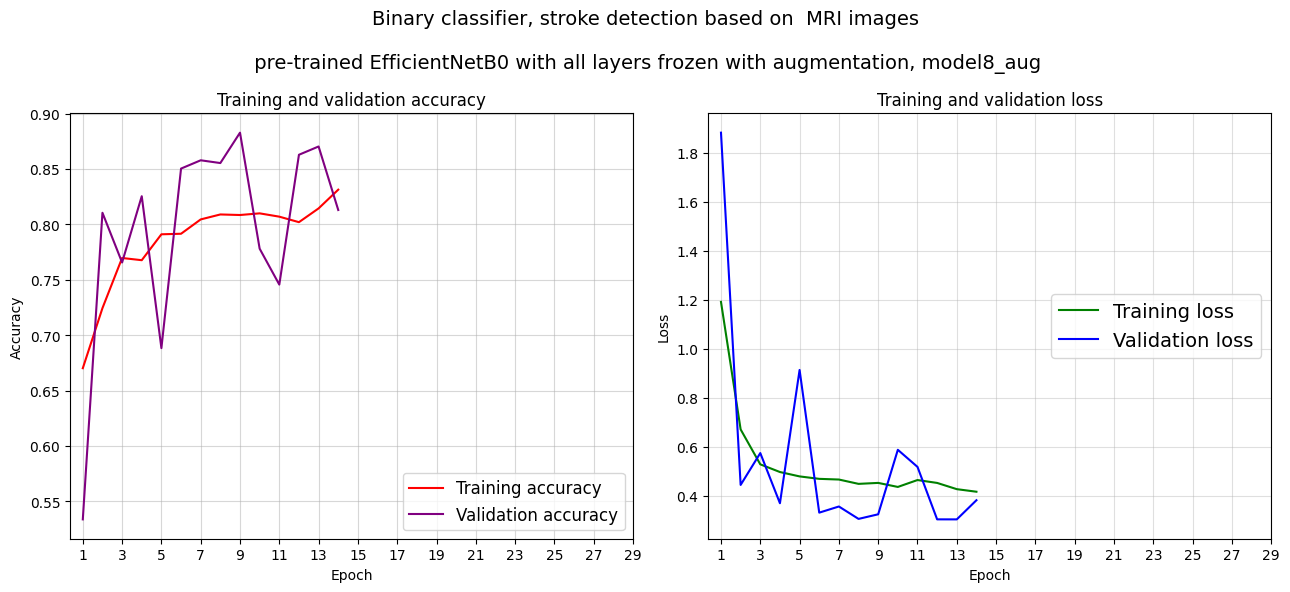

In [76]:
plot_loss_accuracy(history8, "pre-trained EfficientNetB0 with all layers frozen with augmentation, model8_aug")

# MODEL 8 OUTCOME

# MODEL 9_aug

#### pretrained model: EfficientNetB0, 3 unfrozen layers, model9

In [77]:
# instantiating EfficientNetB0 convolutional base
inputs = layers.Input(shape=(224, 224, 3))
pre_trained_model9 = keras.applications.EfficientNetB0(
    input_tensor = inputs,
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights, leave 20 trainable, but not Batchnomalization
# pre_trained_model9.trainable = True
for layer in pre_trained_model9.layers[-20:]:  # loop through all but the last 20 layers
    if not isinstance(layer,layers.BatchNormalization):
        layer.trainable = True  # make them trainable

# printing out the summary of the pretrained model
# pre_trained_model9.summary()

In [78]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model9.get_layer('top_activation') 

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 1280)


In [79]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D(name="avg_pool")(x)
x = layers.BatchNormalization()(x)

# # Add a dropout rate of 0.2
x = layers.Dropout(0.2, name="top_dropout")(x)  

In [80]:
# Add a final sigmmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid', name="pred")(x)           

# Append the dense network to the base model
model9 = Model(pre_trained_model9.input, outputs, name="EfficientNetB0") 

# Print the model summary. See your dense network connected at the end.
# model9.summary()

In [81]:
model9.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model9_aug.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history9 = model9.fit(
    train_generator_en,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator_en,
    callbacks=callbacks
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 286s 785ms/step - binary_accuracy: 0.5521 - loss: 0.8064 - val_binary_accuracy: 0.5661 - val_loss: 0.7673
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 325s 796ms/step - binary_accuracy: 0.7028 - loss: 0.6022 - val_binary_accuracy: 0.6234 - val_loss: 0.8021
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 322s 796ms/step - binary_accuracy: 0.7316 - loss: 0.5655 - val_binary_accuracy: 0.7606 - val_loss: 0.4872
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 270s 803ms/step - binary_accuracy: 0.7687 - loss: 0.4946 - val_binary_accuracy: 0.7955 - val_loss: 0.4056
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 273s 813ms/step - binary_accuracy: 0.7752 - loss: 0.4728 - val_binary_accuracy: 0.8454 - val_loss: 0.3391
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 318s 803ms/step - binary_accuracy: 0.8134 - loss: 0.4192 - val_binary_accuracy: 0.8454 - val_loss: 0.3166
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 273s 813ms/step - binary_accuracy: 0.8225 - loss: 0.3982 - val_binary_accuracy: 0.90

In [96]:
print(len(model9.layers))

243


In [82]:
max(history9.history['val_binary_accuracy'])

0.9800498485565186

In [83]:
#the best model9_aug
best_model9 = keras.models.load_model("model9_aug.keras") 
val_loss, val_binary_acc = best_model9.evaluate(validation_generator_en) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - binary_accuracy: 0.4789 - loss: 25856.5703
Validation accuracy: 0.479


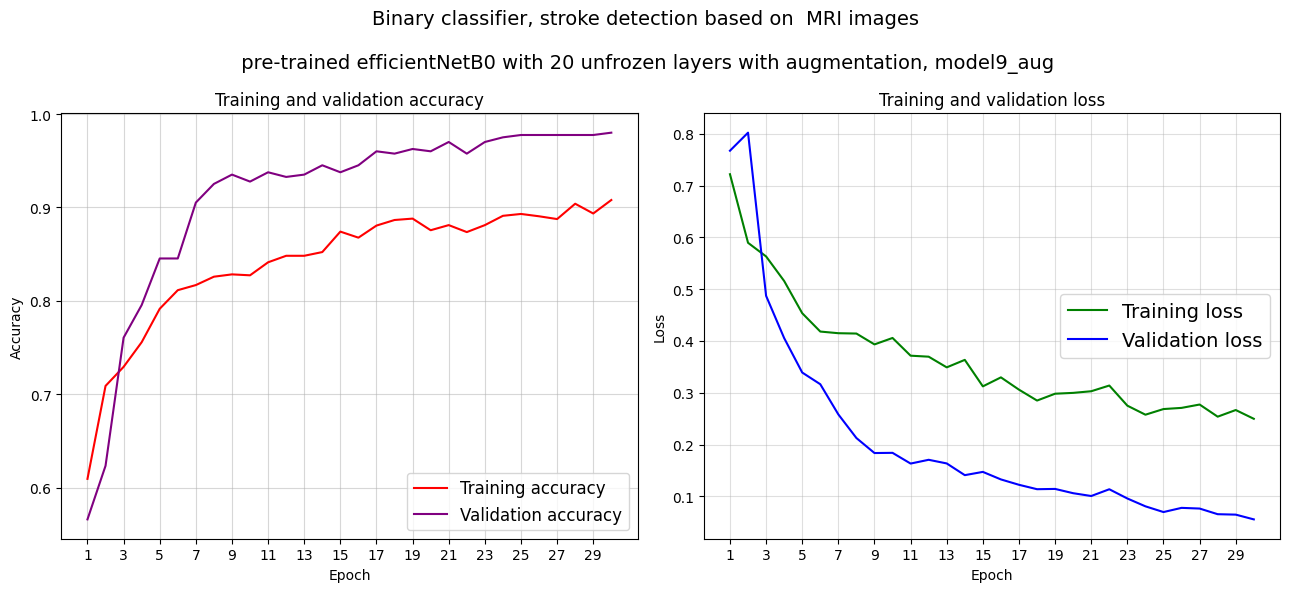

In [84]:
plot_loss_accuracy(history9, "pre-trained efficientNetB0 with 20 unfrozen layers with augmentation, model9_aug")

# MODEL 9 OUTCOME